### HOUSING PRICE IN THE STATE OF WASHINGTON

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('home_data.csv')
print(df.shape)
print(df.dtypes)

#Rest set the price column for avoiding crash on the regression model later
df['price_new'] = df['price']/1000

(21613, 21)
id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_new
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221.9
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538.0
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180.0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604.0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510.0


In [4]:
df_numeric = df.select_dtypes(include='number') 
numeric_cols = df_numeric.columns.values 
print(numeric_cols)
print(df_numeric)

['id' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15' 'price_new']
               id   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520  221900         3       1.00         1180      5650     1.0   
1      6414100192  538000         3       2.25         2570      7242     2.0   
2      5631500400  180000         2       1.00          770     10000     1.0   
3      2487200875  604000         4       3.00         1960      5000     1.0   
4      1954400510  510000         3       2.00         1680      8080     1.0   
...           ...     ...       ...        ...          ...       ...     ...   
21608   263000018  360000         3       2.50         1530      1131     3.0   
21609  6600060120  400000         4       2.50         2310      5813     2.0   
21610  1523300141  402101         2  

In [5]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price_new        0
dtype: int64


Checking if there is any missing values in our dataset for all variables.

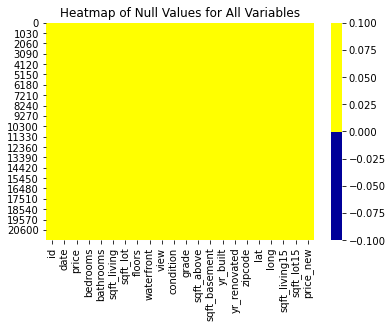

In [6]:
cols = df.columns[:]
plt.title('Heatmap of Null Values for All Variables')
colors = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))
plt.show()

We are dropping the last 4 columns because we are not considering using these variables for our analysis.

In [7]:
cols_to_drop = ['lat','long','sqft_living15','sqft_lot15']
df = df.drop(cols_to_drop, axis=1)

#### Chosen dependent variable as 'price_new', independent variables as 'grade', 'sqft_living', 'floors', & 'bathrooms'.

# Histogram

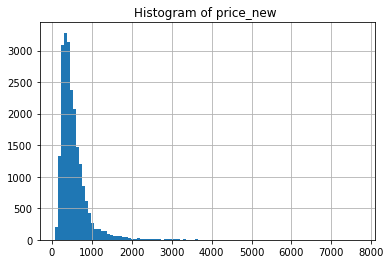

In [8]:
# 1. histogram of price_new. to detect outliers
plt.title('Histogram of price_new ')
df.price_new.hist(bins=100)
plt.show()

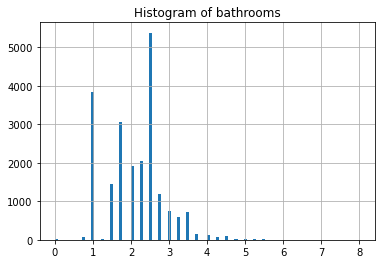

In [9]:
# 2. histogram of bedrooms. to detect outliers
plt.title('Histogram of bathrooms')
df.bathrooms.hist(bins=100)
plt.show()

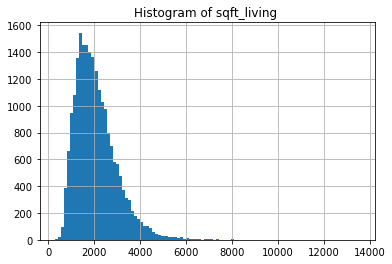

In [10]:
# 3. histogram of sqft_living. to detect outliers
plt.title('Histogram of sqft_living ')
df.sqft_living.hist(bins=100)
plt.show()

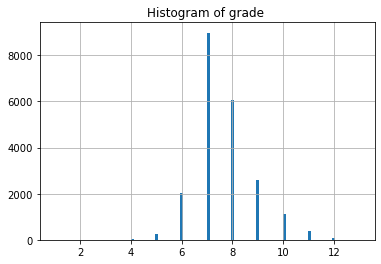

In [11]:
# 4. histogram of grade. to detect outliers
df.grade.hist(bins=100)
plt.title('Histogram of grade ')
plt.show()

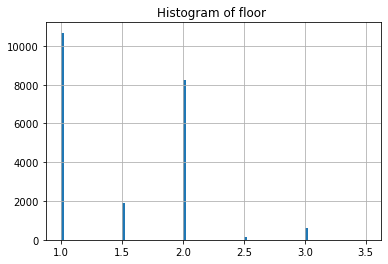

In [12]:
# 5. histogram of floor. to detect outliers
df.floors.hist(bins=100)
plt.title('Histogram of floor ')
plt.show()

# Boxplots

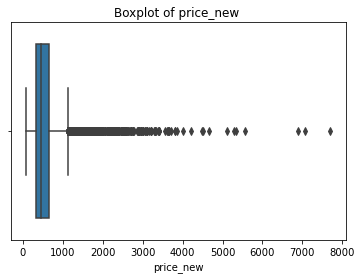

In [13]:
# 1. box plot of price_new to detect outliers
plt.title('Boxplot of price_new ')
sns.boxplot(data=df,x='price_new')
plt.show() 

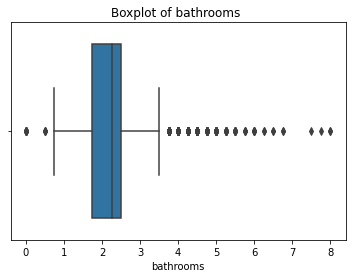

In [14]:
# 2. box plot of bathrooms to detect outliers
plt.title('Boxplot of bathrooms ')
sns.boxplot(data=df,x='bathrooms')
plt.show()

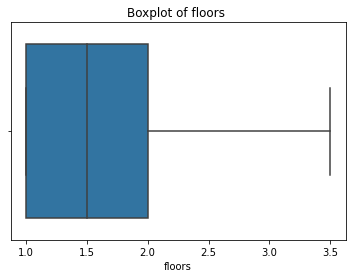

In [15]:
# 3. box plot of floors to detect outliers
plt.title('Boxplot of floors ')
sns.boxplot(data=df,x='floors')
plt.show()

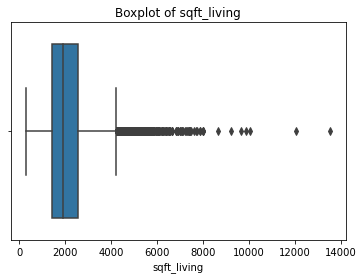

In [16]:
# 4. box plot of sqft_living to detect outliers
plt.title('Boxplot of sqft_living')
sns.boxplot(data=df,x='sqft_living')
plt.show()

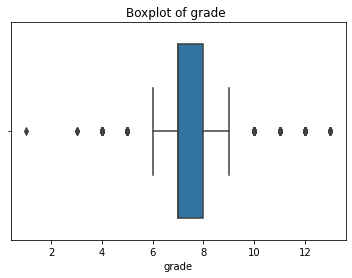

In [17]:
# 5. box plot of grade to detect outliers
plt.title('Boxplot of grade ')
sns.boxplot(data=df,x='grade')
plt.show()

# More detail information of the boxplot:

In [18]:
df['grade'].describe()

count    21613.000000
mean         7.656873
std          1.175459
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [19]:
df['sqft_living'].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [20]:
df['floors'].describe()

count    21613.000000
mean         1.494309
std          0.539989
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [21]:
df['bathrooms'].describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [22]:
df['price_new'].describe()

count    21613.000000
mean       540.088142
std        367.127196
min         75.000000
25%        321.950000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price_new, dtype: float64

##### we are checking if there is any repetition on our data. We found out that the repetition mostly are in the variable of 'waterfront' and 'yr_renovated'. 

However, we are not going to use those two variables.

In [23]:
num_rows = len(df.index) 
low_information_cols = []   

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0] 
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print() 

waterfront: 99.24582%
0    21450
1      163
Name: waterfront, dtype: int64

yr_renovated: 95.77106%
0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64



In [24]:
df_dedupped = df.drop('id', axis=1).drop_duplicates()
print(df.shape) 
print(df_dedupped.shape) 

(21613, 18)
(21613, 17)


There is no duplicate house records in this dataset

# Pairplot

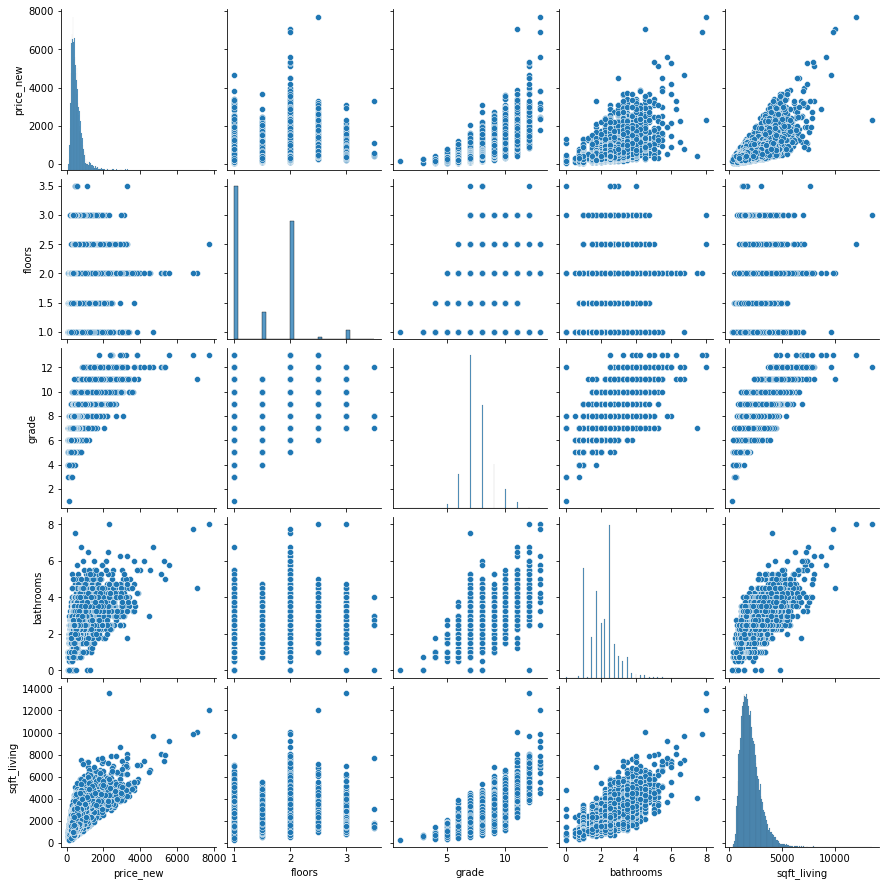

In [25]:
sns.pairplot(df[['price_new','floors','grade','bathrooms','sqft_living']])

# Regression model

In [26]:
import patsy                           
import statsmodels.api as sm          
import statsmodels.formula.api as smf  

#our dataframe is called df
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price_new
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,221.9
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,538.0
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,180.0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,604.0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,510.0


In [27]:
#1. Specify the regression
#price=β0+β1grade+β2sqft_living+β3floors+β4bathrooms+ϵ. #this is a mathematical equation for our research question
#2. Create the model
#Using the statsmodel syntax, we have
#price ~ grade + sqft_living + floors + bathrooms

#WE are creating four different regression models
# #model 1
price_model1= smf.ols('price_new ~ grade', data=df) #running our main explanatory variable 'grade' in Model 1
# #model 2
price_model2= smf.ols('price_new ~ grade + sqft_living', data=df) #adding sqft_living to Model 1
# #model 3
price_model3 = smf.ols('price_new ~ grade + sqft_living + floors', data=df) #adding floors to Model 2
# #model 4
price_model4 = smf.ols('price_new ~ grade + sqft_living + floors + bathrooms', data=df) #adding bathrooms to Model3


In [28]:
#use .fit() method to estimate the model fit for OLS
results1 = price_model1.fit() #model 1 fitting
results2 = price_model2.fit() #model 2 fitting
results3 = price_model3.fit() #model 3 fitting
results4 = price_model4.fit() #model 4 fitting

We print the summary and check the P values for all the independent variables to see if they are statistical significance.

In [29]:
print(results1.summary())
print(results2.summary())
print(results3.summary())
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:              price_new   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:35:34   Log-Likelihood:            -1.5194e+05
No. Observations:               21613   AIC:                         3.039e+05
Df Residuals:                   21611   BIC:                         3.039e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1056.0450     12.256    -86.166      0.0

We reorganized the summary from above and put important results for all models into one summary table.

In [30]:
from statsmodels.iolib.summary2 import summary_col #create regression table

table = summary_col(
    [results1, results2, results3, results4],
    model_names = ['Model 1', 'Model 2', 'Model 3','Model 4'], 
    stars=True, #level of significance
    regressor_order = ['Intercept', 'grade', 'sqft_living', 'floors', 'bathroom',],
    float_format='%0.2f', 
    drop_omitted = False #
    )

table.add_title('Does higher grade have a higher housing price?') # RQ: How does 'grade' affect the housing price the most?
# controlling sqft_living, floors, and bathrooms

print(table.as_text())

# The 'w' is for 'write'.
fout = open('table1.txt', 'w')
fout.write(table.as_text()) 
fout.close()

      Does higher grade have a higher housing price?
                 Model 1    Model 2    Model 3    Model 4  
-----------------------------------------------------------
Intercept      -1056.04*** -598.11*** -602.58*** -601.35***
               (12.26)     (13.30)    (13.26)    (13.24)   
grade          208.46***   98.55***   107.64***  109.45*** 
               (1.58)      (2.24)     (2.35)     (2.36)    
sqft_living                0.18***    0.18***    0.20***   
                           (0.00)     (0.00)     (0.00)    
floors                                -43.96***  -34.65*** 
                                      (3.54)     (3.76)    
bathrooms                                        -26.67*** 
                                                 (3.65)    
R-squared      0.45        0.53       0.54       0.54      
R-squared Adj. 0.45        0.53       0.54       0.54      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
